<a href="https://colab.research.google.com/github/feldon0606/day_19/blob/main/Swimming_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks 
## This the list of stuff to do


1.   Drop duplicate columns 
2.   Figure out how to plot the LSOA and colour code them based on delta values
3.   Look into only keeping the areas with biggest change
4.  Figure out whether +/-1000 means an area is more or less affordable than it was.
5. Find and save a link to IMD documentation somewhere here.
6. figure out a nice folder structure and load the variables with it.
7. Find median house price by LSOA/MSOA 2019/15 datasets.


In [ ]:
!wget -O IMD_2015.csv https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/467774/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv
!wget -O IMD_2019.csv https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/845345/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv
!wget -O LSOA.zip https://data.cambridgeshireinsight.org.uk/sites/default/files/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.zip

--2021-08-17 20:08:36--  https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/467774/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv
Resolving assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)... 151.101.0.144, 151.101.64.144, 151.101.128.144, ...
Connecting to assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)|151.101.0.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9783456 (9.3M) [text/csv]
Saving to: ‘IMD_2015.csv’

IMD_2015.csv        100%[===================>]   9.33M  --.-KB/s    in 0.1s    

2021-08-17 20:08:36 (87.4 MB/s) - ‘IMD_2015.csv’ saved [9783456/9783456]

--2021-08-17 20:08:36--  https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/845345/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv
Resolving assets.publishing.service.gov.uk (as

In [ ]:
import pandas as pd
#read csvs
imd_2015 = pd.read_csv("IMD_2015.csv")
imd_2019 = pd.read_csv("IMD_2019.csv")

#sort pandas
imd_2015 = imd_2015.sort_values(by=['LSOA code (2011)'], ignore_index=True)
imd_2019 = imd_2019.sort_values(by=['LSOA code (2011)'], ignore_index=True)

#grab just area codes and names
names_codes = imd_2019[["LSOA code (2011)","LSOA name (2011)"]]

In [ ]:
#finding the difference
delta_housing_barriers =  imd_2019["Barriers to Housing and Services Rank (where 1 is most deprived)"] - imd_2015["Barriers to Housing and Services Rank (where 1 is most deprived)"]

In [ ]:
names_codes["delta_housing_barriers"] = delta_housing_barriers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
names_codes.rename({"LSOA code (2011)":"lsoa11cd"}, axis=1, inplace=True)
names_codes.head()

,lsoa11cd,LSOA name (2011),delta_housing_barriers
0,E01000001,City of London 001A,-1737
1,E01000002,City of London 001B,1991
2,E01000003,City of London 001C,-3476
3,E01000005,City of London 001E,-1764
4,E01000006,Barking and Dagenham 016A,-1164


# PLOTTING ON A GRAPH, COLOUR CODING BY DIFFERENCE

In [ ]:
!pip install geopandas

!unzip LSOA.zip

Archive:  LSOA.zip
  inflating: Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.xml  
  inflating: Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.prj  
 extracting: Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.cpg  
  inflating: Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shx  
  inflating: Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp  
  inflating: Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.dbf  


In [ ]:
import geopandas as gp
LSOA = gp.read_file("Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp")

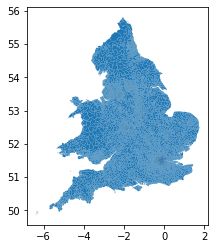

In [ ]:
LSOA.plot()

In [ ]:
LSOA.sort_values(by=["lsoa11cd"], ignore_index=True)

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry
0,1,E01000001,City of London 001A,City of London 001A,1.333208e+05,2291.846072,"POLYGON ((-0.09726 51.52158, -0.09649 51.52028..."
1,2,E01000002,City of London 001B,City of London 001B,2.261913e+05,2433.960112,"POLYGON ((-0.08810 51.51941, -0.08927 51.51752..."
2,3,E01000003,City of London 001C,City of London 001C,5.730297e+04,1142.359799,"POLYGON ((-0.09676 51.52325, -0.09644 51.52282..."
3,4,E01000005,City of London 001E,City of London 001E,1.907388e+05,2167.868343,"POLYGON ((-0.07320 51.51000, -0.07551 51.50974..."
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,1.441958e+05,1935.510354,"POLYGON ((0.09118 51.53909, 0.09328 51.53787, ..."
...,...,...,...,...,...,...,...
34748,34749,W01001954,Cardiff 006F,Caerdydd 006F,6.471879e+05,5353.810154,"POLYGON ((-3.25546 51.52101, -3.25489 51.51968..."
34749,34750,W01001955,Swansea 025F,Abertawe 025F,6.900149e+05,5776.750473,"POLYGON ((-3.94053 51.63059, -3.93913 51.62702..."
34750,34751,W01001956,Swansea 023E,Abertawe 023E,2.493308e+06,12586.351015,"POLYGON ((-4.02465 51.63615, -4.02458 51.63574..."
34751,34752,W01001957,Swansea 025G,Abertawe 025G,2.144800e+05,2635.105196,"POLYGON ((-3.94920 51.61754, -3.94814 51.61670..."


In [ ]:
LSOA = LSOA.merge(names_codes, on='lsoa11cd')

In [ ]:
LSOA.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry,LSOA name (2011),delta_housing_barriers
0,1,E01000001,City of London 001A,City of London 001A,133320.768872,2291.846072,"POLYGON ((-0.09726 51.52158, -0.09649 51.52028...",City of London 001A,-1737
1,2,E01000002,City of London 001B,City of London 001B,226191.272990,2433.960112,"POLYGON ((-0.08810 51.51941, -0.08927 51.51752...",City of London 001B,1991
2,3,E01000003,City of London 001C,City of London 001C,57302.966538,1142.359799,"POLYGON ((-0.09676 51.52325, -0.09644 51.52282...",City of London 001C,-3476
3,4,E01000005,City of London 001E,City of London 001E,190738.760504,2167.868343,"POLYGON ((-0.07320 51.51000, -0.07551 51.50974...",City of London 001E,-1764
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,144195.846857,1935.510354,"POLYGON ((0.09118 51.53909, 0.09328 51.53787, ...",Barking and Dagenham 016A,-1164
